In [1]:
import numpy as np
import pandas as pd
import scipy 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from statsmodels.tsa.arima_model import ARIMA

from arch import arch_model
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()



In [2]:
raw_csv_data = pd.read_csv("Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst =True)
df_comp.set_index("date", inplace= True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value'] = df_comp.ftse

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [5]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(df.market_value, order=(1,1,1))

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27604.005
Date:                Sat, 03 Dec 2022   AIC                          55214.010
Time:                        19:07:25   BIC                          55233.574
Sample:                    01-07-1994   HQIC                         55220.865
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7460      0.059     12.659      0.000       0.631       0.862
ma.L1         -0.7920      0.053    -14.930      0.000      -0.896      -0.688
sigma2      3498.4453     40.925     85.484      0.000    3418.233    3578.657
===================================================================================
Ljung-Box (L1) (Q):                   2.62   Jarque-Bera (JB):              3326.29
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Simple Forecasting

In [6]:
df.tail()

,market_value
date,
2013-04-01,6411.74
2013-04-02,6490.66
2013-04-03,6420.28
2013-04-04,6344.11
2013-04-05,6249.77


In [7]:
df_test.head()

,market_value
date,
2013-04-08,6276.94
2013-04-09,6313.20
2013-04-10,6387.37
2013-04-11,6416.14
2013-04-12,6384.39


In [8]:
df_test.tail()

,market_value
date,
2018-01-23,7731.827774
2018-01-24,7643.428966
2018-01-25,7615.839954
2018-01-26,7665.541292
2018-01-29,7671.533300


In [9]:
start_date = "2013-04-08"
end_date = "2018-01-26"
df_pred = results.predict(start= start_date, end = end_date)

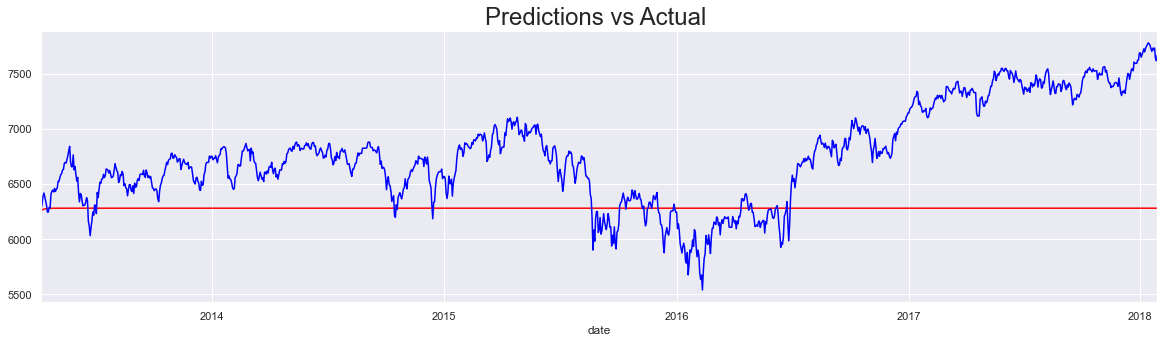

In [10]:
df_pred[start_date:end_date].plot(figsize=(20,5), color= "red")
df_test.market_value[start_date:end_date].plot(color="blue")
plt.title("Predictions vs Actual ", size =24)
plt.show()

# Using Returns instead

In [11]:
df_comp = raw_csv_data
df_comp.date = pd.to_datetime(df_comp.date, dayfirst =True)
df_comp.set_index("date", inplace= True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')
df_comp['ret_spx'] = df_comp.spx.pct_change(1)*100
df_comp['ret_dax'] = df_comp.dax.pct_change(1)*100
df_comp['ret_ftse'] = df_comp.ftse.pct_change(1)*100
df_comp['ret_nikkei'] = df_comp.nikkei.pct_change(1)*100

In [12]:
size = int(len(df_comp)*0.8)
df, df_test = df_comp['ret_ftse'].iloc[:size], df_comp.iloc[size:]

# AR Model Predictions

In [13]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(df, order = (1,0,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               ret_ftse   No. Observations:                 5021
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -7929.749
Date:                Sat, 03 Dec 2022   AIC                          15865.497
Time:                        19:07:25   BIC                          15885.062
Sample:                    01-07-1994   HQIC                         15872.353
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.143      0.253      -0.013       0.051
ar.L1         -0.0230      0.009     -2.697      0.007      -0.040      -0.006
sigma2         1.3790      0.014    100.092      0.000       1.352       1.406
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7878.96
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
df_test.head()

,spx,dax,ftse,nikkei,ret_spx,ret_dax,ret_ftse,ret_nikkei
date,,,,,,,,
2013-04-08,1563.071269,7662.64,6276.94,13192.59,0.630430,0.050792,0.434736,2.796946
2013-04-09,1568.607909,7637.51,6313.20,13192.35,0.354215,-0.327955,0.577670,-0.001819
2013-04-10,1587.731827,7810.63,6387.37,13288.13,1.219165,2.266707,1.174840,0.726027
2013-04-11,1593.369863,7871.63,6416.14,13549.16,0.355100,0.780987,0.450420,1.964385
2013-04-12,1588.854623,7744.77,6384.39,13485.14,-0.283377,-1.611610,-0.494846,-0.472502


In [15]:
start_date = "2013-04-08"
end_date = "2018-01-26"
df_pred = results.predict(start= start_date, end = end_date)

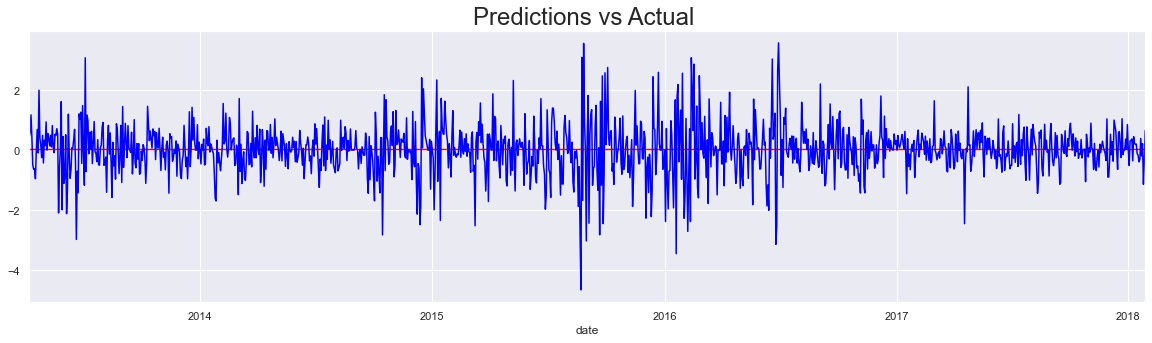

In [16]:
df_pred[start_date:end_date].plot(figsize=(20,5), color= "red")
df_test.ret_ftse[start_date:end_date].plot(color="blue")
plt.title("Predictions vs Actual ", size =24)
plt.show()

# MA Model Predictions

In [17]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(df, order = (0,0,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               ret_ftse   No. Observations:                 5021
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -7929.595
Date:                Sat, 03 Dec 2022   AIC                          15865.190
Time:                        19:08:49   BIC                          15884.754
Sample:                    01-07-1994   HQIC                         15872.045
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.146      0.252      -0.013       0.051
ma.L1         -0.0257      0.009     -3.018      0.003      -0.042      -0.009
sigma2         1.3789      0.014     99.990      0.000       1.352       1.406
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7859.07
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
start_date = "2013-04-08"
end_date = "2018-01-26"
df_pred = results.predict(start= start_date, end = end_date)

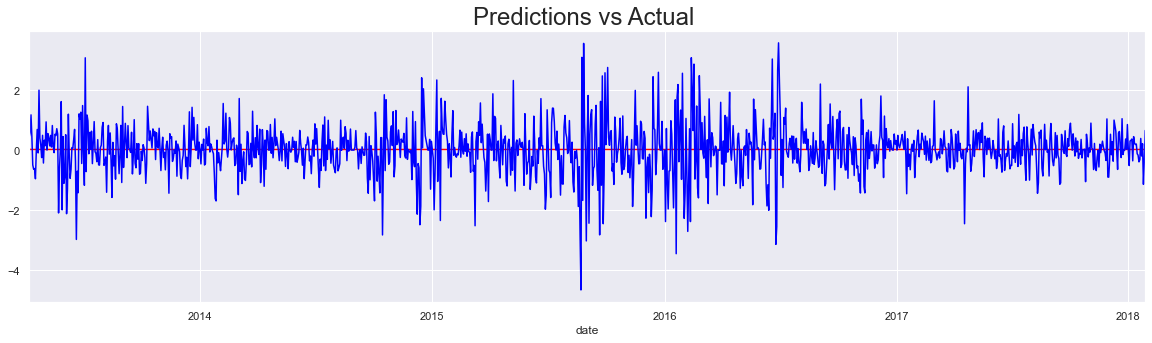

In [19]:
df_pred[start_date:end_date].plot(figsize=(20,5), color= "red")
df_test.ret_ftse[start_date:end_date].plot(color="blue")
plt.title("Predictions vs Actual ", size =24)
plt.show()

In [20]:
df_pred.head()

2013-04-08    0.058333
2013-04-09    0.018766
2013-04-10    0.018766
2013-04-11    0.018766
2013-04-12    0.018766
Freq: B, Name: predicted_mean, dtype: float64

# ARMA Model Predictions

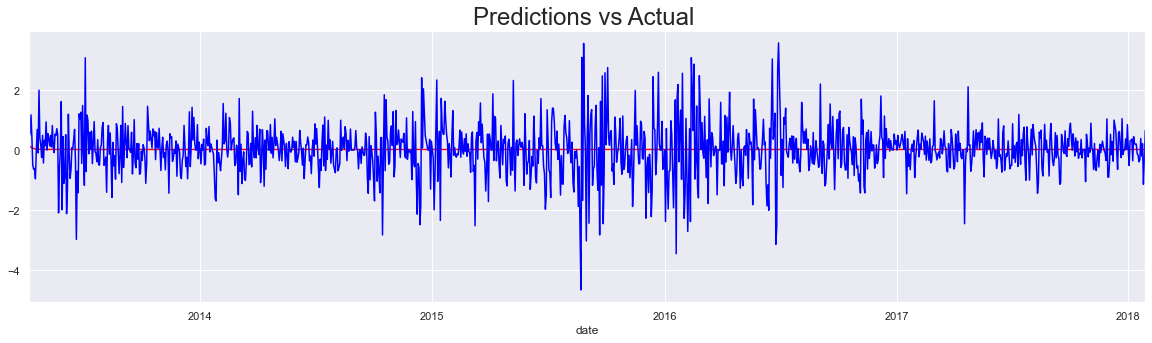

In [21]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(df, order = (1,0,1))
results = model.fit()
start_date = "2013-04-08"
end_date = "2018-01-26"
df_pred = results.predict(start= start_date, end = end_date)
df_pred[start_date:end_date].plot(figsize=(20,5), color= "red")
df_test.ret_ftse[start_date:end_date].plot(color="blue")
plt.title("Predictions vs Actual ", size =24)
plt.show()

In [22]:
df_pred.head()

2013-04-08    0.147406
2013-04-09    0.117208
2013-04-10    0.094107
2013-04-11    0.076434
2013-04-12    0.062915
Freq: B, Name: predicted_mean, dtype: float64

In [23]:
df_pred.tail()

2018-01-22    0.018902
2018-01-23    0.018902
2018-01-24    0.018902
2018-01-25    0.018902
2018-01-26    0.018902
Freq: B, Name: predicted_mean, dtype: float64

In [26]:
df_comp['ret_spx'] = df_comp.spx.pct_change(1)*100
df_comp['ret_dax'] = df_comp.dax.pct_change(1)*100
df_comp['ret_ftse'] = df_comp.ftse.pct_change(1)*100
df_comp['ret_nikkei'] = df_comp.nikkei.pct_change(1)*100

# ARMAX Model Predictions

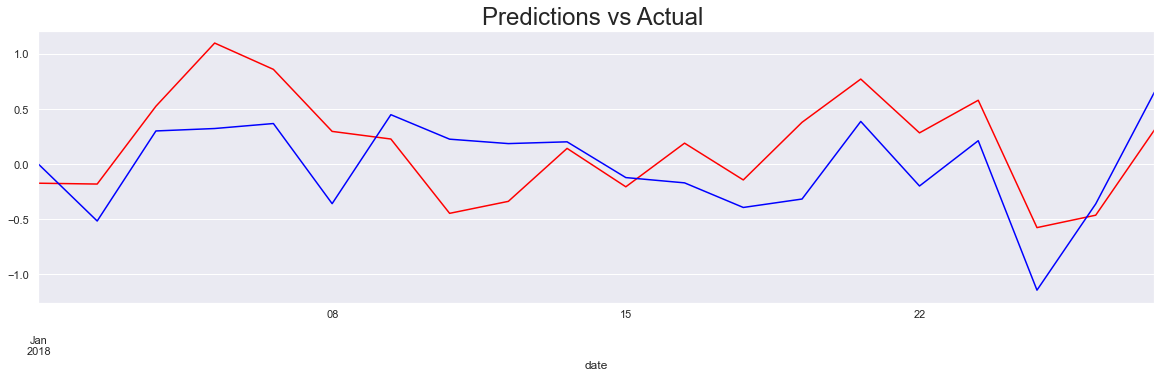

In [39]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(df_comp.ret_ftse[1:], exog =df_comp[["ret_spx", "ret_dax", "ret_nikkei"]][1:], order = (1,0,1))
results = model.fit()
start_date = "2018-01-01"
end_date = "2018-01-26"
df_pred = results.predict(start= start_date, end = end_date, 
                          exog =df_comp[["ret_spx", "ret_dax", "ret_nikkei"]][start_date:end_date])
df_pred[start_date:end_date].plot(figsize=(20,5), color= "red")
df_test.ret_ftse[start_date:end_date].plot(color="blue")
plt.title("Predictions vs Actual ", size =24)
plt.show()

# SARIMAX Model Predictions

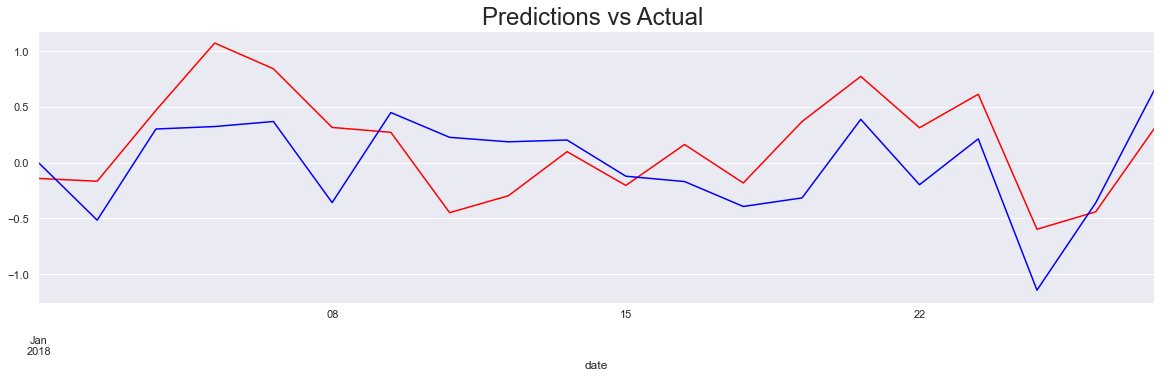

In [41]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(df_comp.ret_ftse[1:], exog =df_comp[["ret_spx", "ret_dax", "ret_nikkei"]][1:], order = (3,0,4),
                             seasonal_order = (3,0,2,5) )
results = model.fit()
start_date = "2018-01-01"
end_date = "2018-01-26"
df_pred = results.predict(start= start_date, end = end_date, 
                          exog =df_comp[["ret_spx", "ret_dax", "ret_nikkei"]][start_date:end_date])
df_pred[start_date:end_date].plot(figsize=(20,5), color= "red")
df_test.ret_ftse[start_date:end_date].plot(color="blue")
plt.title("Predictions vs Actual ", size =24)
plt.show()

# Auto ARIMA model Predictions

In [43]:
from pmdarima.arima import auto_arima
model_auto = auto_arima(df_comp.ret_ftse[1:])

In [48]:
start_date = "2018-01-01"
end_date = "2018-01-26"
df_auto_pred = pd.DataFrame (model_auto.predict(n_periods = len(df_comp.ret_ftse[1:][start_date:end_date]),
                                               index = df_comp[start_date:end_date].index))

<AxesSubplot:>

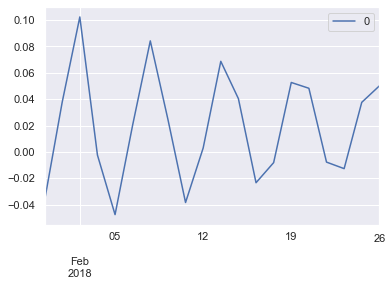

In [52]:
df_auto_pred.plot()

# Forecasting with Volatality based models

In [79]:
from arch import arch_model
model_garch = arch_model(df_comp.ret_ftse[1:], mean= "Constant", vol= "GARCH", p=1,q=1, dist="Normal")
results_garch = model_garch.fit( last_obs = start_date, update_freq= 10)

Iteration:     10,   Func. Count:     64,   Neg. LLF: 8397.784787583265
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8397.784786782957
            Iterations: 11
            Function evaluations: 69
            Gradient evaluations: 11


In [80]:
pred_garch = results_garch.forecast(horizon=1, align = 'target')

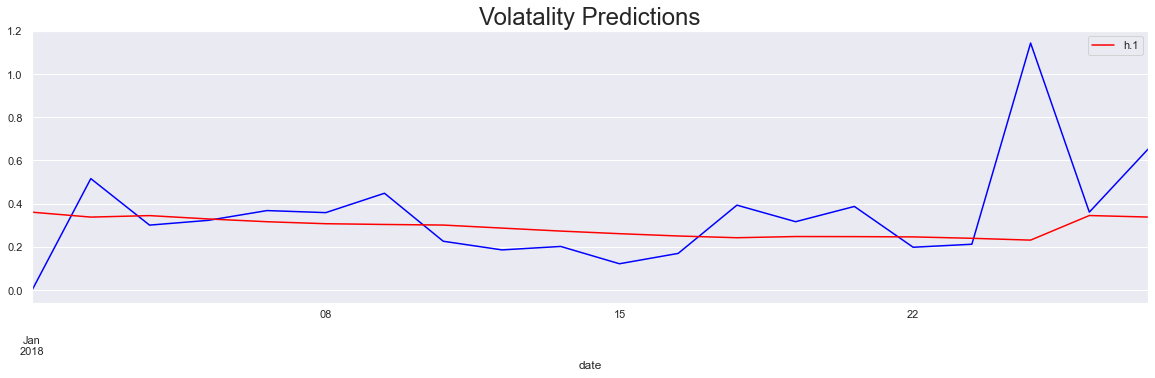

In [81]:
pred_garch.residual_variance[start_date:end_date].plot(figsize=(20,5), color='red', zorder= 2)
df_comp.ret_ftse[1:][start_date:end_date].abs().plot(color = "blue", zorder =1)
plt.title("Volatality Predictions", size =24)
plt.show()

In [82]:
pred_garch = results_garch.forecast(horizon=100, align = 'target')
pred_garch.residual_variance[-1:]

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.091,h.092,h.093,h.094,h.095,h.096,h.097,h.098,h.099,h.100
date,,,,,,,,,,,,,,,,,,,,,
2018-01-29,0.350365,0.347375,0.363283,0.261916,0.279936,0.295843,0.306613,0.316455,0.320765,0.337405,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Multivariate Regression Model
# Vector Auto Regressive Model (VAR) 

In [83]:
from statsmodels.tsa.api import VAR

In [84]:
df_ret = df_comp [['ret_spx', 'ret_dax', 'ret_ftse', 'ret_nikkei']][1:]

In [85]:
model_var_ret = VAR (df_ret)
model_var_ret.select_order(20)
results_var_ret = model_var_ret.fit(ic='aic')

In [86]:
results_var_ret.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 03, Dec, 2022
Time:                     20:11:07
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   0.155221
Nobs:                     6268.00    HQIC:                 0.0624193
Log likelihood:          -35485.0    FPE:                    1.01330
AIC:                    0.0132130    Det(Omega_mle):        0.992240
--------------------------------------------------------------------
Results for equation ret_spx
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.043474         0.014269            3.047           0.002
L1.ret_spx           -0.106770         0.016169           -6.603           0.000
L1.ret_dax            0.060328         0.017014           

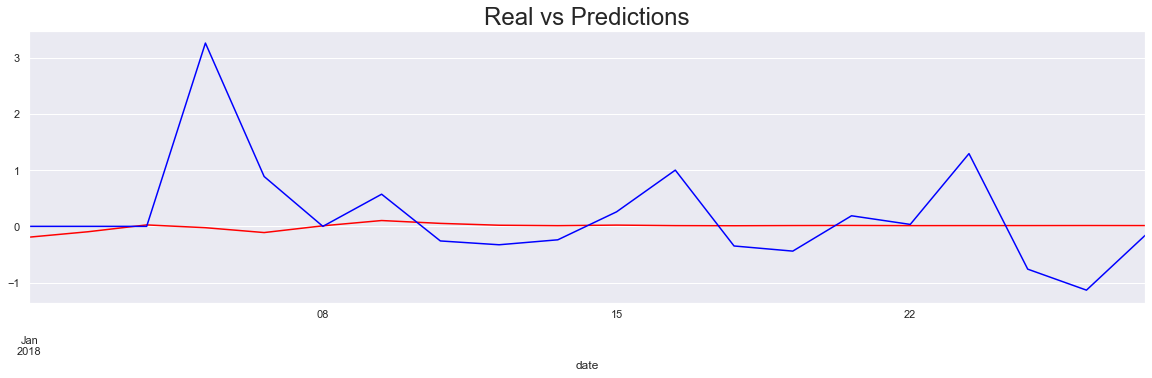

In [87]:
lag_order_ret = results_var_ret.k_ar
var_pred_ret = results_var_ret.forecast(df_ret.values[-lag_order_ret:], len(df_test[start_date:end_date]))

df_ret_pred = pd.DataFrame (data = var_pred_ret, index = df_test[start_date:end_date].index,
                           columns = df_test[start_date:end_date].columns[4:8])

df_ret_pred.ret_nikkei[start_date:end_date].plot(figsize=(20,5), color = 'red')
df_test.ret_nikkei[start_date:end_date].plot(color="blue")
plt.title("Real vs Predictions", size = 24)
plt.show()

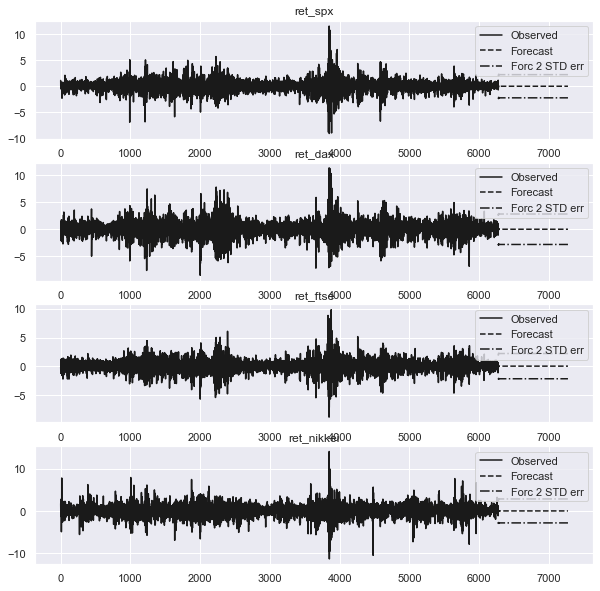

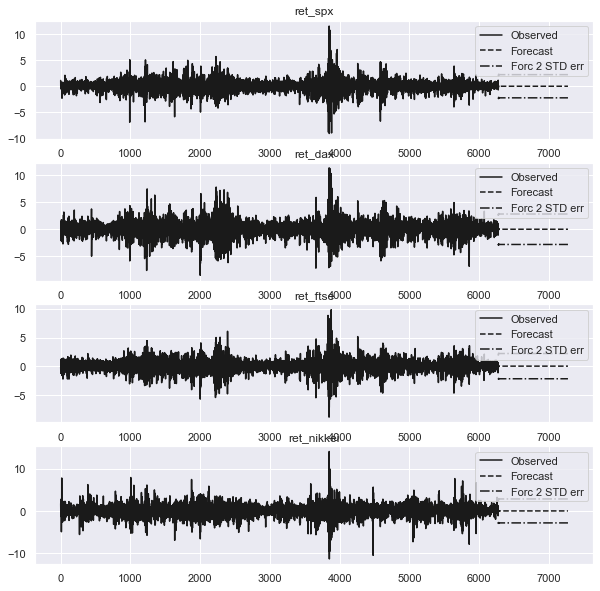

In [88]:
results_var_ret.plot_forecast(1000)